### Clustering

Jay Urbain, PhD


1 - Review clustering and K-Means

2 - Review clusting with scikit-learn and the iris dataset.

3 - K-Mean clustering the adult dataset.

### Clustering###

You are given a data set where each observed example has a set of features, but has no labels. Labels are an essential for a supervised learning algorithm like *Logistic Regression*, which learns a model (hypothesis function) to predict labels given features. So what can we do to better understand the data?

One of the most straightforward tasks we can perform on a dataset is to find groups of data which are similar to one another -- what we call clusters.

*K-Means* is one of the most popular "clustering" algorithms. K-means stores *k* centroids that it uses to define clusters. A point (instance) is assigned to a particular cluster if it is *closer* to that cluster's centroid than any other cluster centroid.

K-Means finds the best centroids by alternating between:

1) assigning data points to clusters based on the current cluster centroids (cluster parameters)

2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

<img src="kmeansViz.png">

*Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan.*

### Clustering with scikit-learn

[http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#)

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) used below consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray .
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



In [2]:
from sklearn import cluster, datasets
# plots within notebook versus launching a separate window
%matplotlib inline 

iris = datasets.load_iris()
X_iris = iris.data
print (X_iris[1:10,])
print (type(X_iris))
print (X_iris.shape)

y_iris = iris.target
print (type(y_iris))
print (y_iris.shape)
#print type(y_iris)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
print('k_means labels:', k_means.labels_[1:10,])
print('y_iris data:', y_iris[1:10,])


[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)
k_means labels: [1 1 1 1 1 1 1 1 1]
y_iris data: [0 0 0 0 0 0 0 0 0]


In [3]:
import pprint as pp
pp.pprint(iris.DESCR)

('Iris Plants Database\n'
 '====================\n'
 '\n'
 'Notes\n'
 '-----\n'
 'Data Set Characteristics:\n'
 '    :Number of Instances: 150 (50 in each of three classes)\n'
 '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 '        - sepal length in cm\n'
 '        - sepal width in cm\n'
 '        - petal length in cm\n'
 '        - petal width in cm\n'
 '        - class:\n'
 '                - Iris-Setosa\n'
 '                - Iris-Versicolour\n'
 '                - Iris-Virginica\n'
 '    :Summary Statistics:\n'
 '\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '                    Min  Max   Mean    SD   Class Correlation\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n'
 '    petal width: 

The plots below display what a *K-means* algorithm would yield using three clusters. It is then shown what the effect of a bad initialization is on the classification process: By setting *n_init* to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. The next plot displays what using eight clusters would deliver, and finally the ground truth.

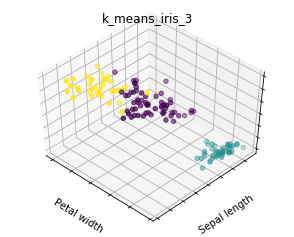

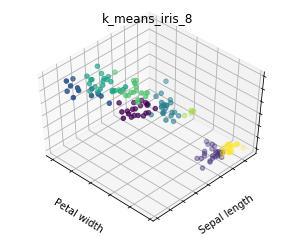

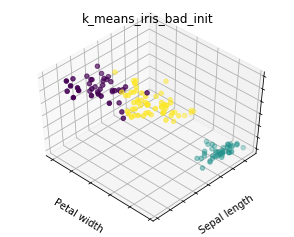

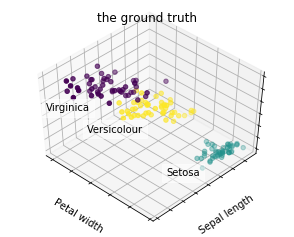

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(name)
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('the ground truth')
plt.show()

### Clustering the Adult Dataset

The adult dataset is an example of a complex real world data set. In this dataset, the aim is to estimate if someone earns more than $50,000 per year. The dataset attributes describe a person, their environment, their background, and their life status.

*Attribute Information*

- \>50K, <=50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, - Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-- spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### 1) Download and examine the adult data set

To download the dataset, navigate to [http://archive.ics.uci.edu/ml/datasets/Adult](http://archive.ics.uci.edu/ml/datasets/Adult), click on the *Data Folder* link, 
and download the *adult.data* and *adult.names* files into a *data* subdirectory to your IPython notebook. You can also read a description of the dataset.

The adult dataset can be used for classifiction, but we are going to see what we can discover about relationships in the data using clustering.

In [5]:
# Download

import os
import pandas as pd
adult_filename= "data/adult.data"

adult = pd.read_csv(adult_filename, header=None,
    names=["Age", "Work-Class","fnlwgt", 
    "Education", "Education-Num",
    "Martial-Status", "Occupation",
    "Relationship", "Race", "Sex",
    "Capital-gain", "Captial-loss",
    "Hours-per-week", "Natie-Country",
    "Earnings-Raw"])

In [6]:
# Examine the data 
# Note: there are many attributes, so you may need to scroll right

adult.head(n=20)

,Age,Work-Class,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-gain,Captial-loss,Hours-per-week,Natie-Country,Earnings-Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Data files can contain extra blank lines at the end of the file. By default, *pandas* will interpret the penultimate new line to be an empty (but valid) row. To remove this, remvove any row with invalid numbers. The *inplace* parameter just makes the change in the give Dataframe, rather than create a new Dataframe.

In [7]:
print (adult.shape)
adult.dropna(how='all', inplace=True) #all here means only rows with all NA will b removed
print (adult.shape)

(32561, 15)
(32561, 15)


### 2)  Examining the attributes

Pandas dataframes provide useful functions for describing a dataset. 

You can access each column as shown below. There are several functions you can run on each column to better understand the type and distribution of each attribute. Some functions may not make sense, e.g., mean of Marital-Status.

[http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html](http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html)

a) Add additional notebook cells below to examine *each* column in the dataset. 

b) For each column, identify the data type as numeric, ordinal, or categorical. 

I've provided some examples. In each case, you want to examine some of the rows in the dataset. You can use the dataframe head() function. For numeric attributes consider using the pandas dataframe describe() and matplotlib histogram plot functions. For categorical and ordinal attributes you can generate a crosstab table and a matplotlib barplot. *Note: You can use crosstab for comparing different attributes that share the same categories.* To compare numberic attributes, you can use a scatter plot. Many options here. Experiment!


In [8]:
adult.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'Education', 'Education-Num',
       'Martial-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Captial-loss', 'Hours-per-week', 'Natie-Country',
       'Earnings-Raw'],
      dtype='object')

In [9]:
adult["Age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

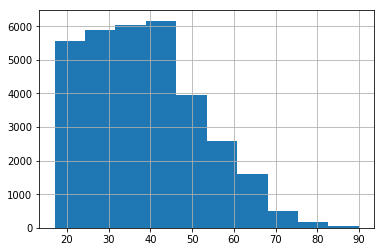

In [10]:
adult['Age'].hist(bins=10)

In [11]:
# unique categorical values
adult["Work-Class"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
adult["Work-Class"].describe()

count        32561
unique           9
top        Private
freq         22696
Name: Work-Class, dtype: object

In [13]:
# cross tab
result = adult[['Work-Class']].apply(pd.value_counts).fillna(0).T
result.index=['Work-Class']
result.columns=[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,State-gov,Self-emp-not-inc,Private,Federal-gov,Local-gov,?,Self-emp-inc,Without-pay,Never-worked
Work-Class,22696,2541,2093,1836,1298,1116,960,14,7


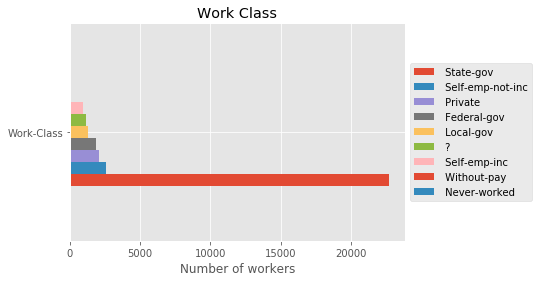

In [14]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Work Class")
plt.set_xlabel("Number of workers")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

work class looks useful

In [15]:
adult["Hours-per-week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [16]:
# cross tab
result = adult[['Hours-per-week']].apply(pd.value_counts).fillna(0).T
result.index=['Hours-per-week']
result.columns=adult["Hours-per-week"].unique()
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,40,13,16,45,50,80,30,35,60,20,...,67,82,86,91,81,76,92,61,74,95
Hours-per-week,15217,2819,1824,1475,1297,1224,1149,694,674,517,...,2,2,2,2,2,1,1,1,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb70afe9160>]],
      dtype=object)

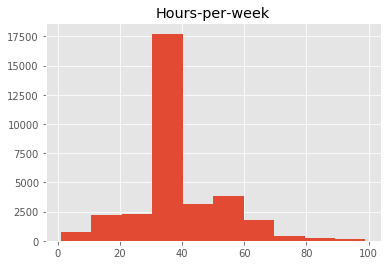

In [17]:
# horizontal bar plot
adult[['Hours-per-week']].hist()

looks like majority of people work 40 hours a week, and then it trickles thru part time workers until getting minor outliers. (info taken from removed hbargraph).

this attirbute may be useful

In [18]:
adult["fnlwgt"].describe()

count      32,561
mean      189,778
std       105,550
min        12,285
25%       117,827
50%       178,356
75%       237,051
max     1,484,705
Name: fnlwgt, dtype: float64

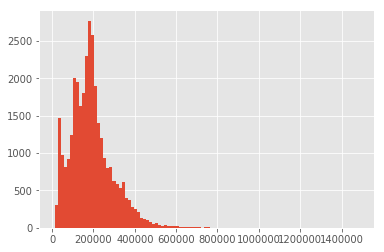

In [19]:
adult['fnlwgt'].hist(bins=100)

may be useful. prefer to use other metrics tho.

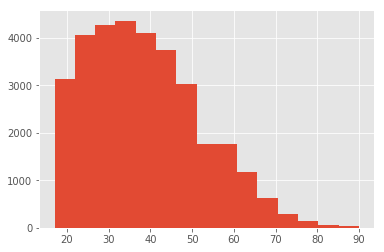

In [20]:
adult['Age'].hist(bins = 15)

age looks like a useful predictor

In [21]:
adult['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
# cross tab
result = adult[['Education']].apply(pd.value_counts).fillna(0).T
result.index=['Education']
result.columns=adult["Education"].unique()
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Bachelors,HS-grad,11th,Masters,9th,Some-college,Assoc-acdm,Assoc-voc,7th-8th,Doctorate,Prof-school,5th-6th,10th,1st-4th,Preschool,12th
Education,10501,7291,5355,1723,1382,1175,1067,933,646,576,514,433,413,333,168,51


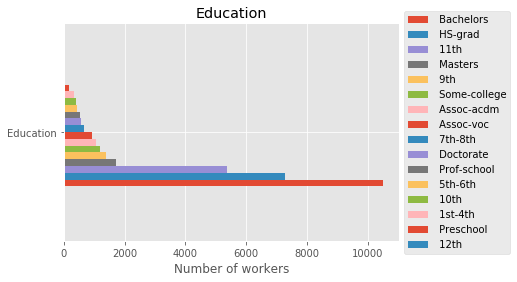

In [23]:
# horizontal bar plot
plt=result.plot.barh(title="Education")
plt.set_xlabel("Number of workers")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

In [24]:
adult["Education-Num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

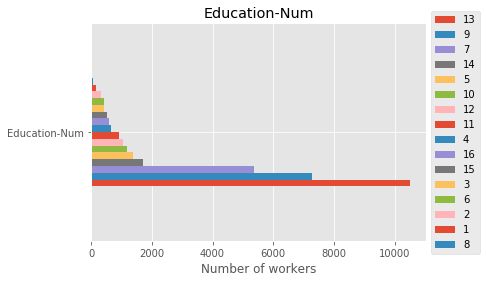

In [25]:
# cross tab
result = adult[["Education-Num"]].apply(pd.value_counts).fillna(0).T
result.index=["Education-Num"]
result.columns=adult["Education-Num"].unique()
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result
# horizontal bar plot
plt=result.plot.barh(title="Education-Num")
plt.set_xlabel("Number of workers")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

education num not that usable? prefer other attributes.

Education num and education yield the same graph! not surprised 

![alttext](http://i.imgur.com/R3X0i.jpg)

In [26]:
def returnResults(column_name):
    result = adult[[column_name]].apply(pd.value_counts).fillna(0).T
    result.index=[column_name]
    result.columns=adult[column_name].unique()
    pd.options.display.float_format = '{:,.0f}'.format
    return result

In [27]:
def plotHBarGraph(column_name, result = None):
    if (result == None):
        result = returnResults(column_name)
    # horizontal bar plot
    plt=result.plot.barh(title=column_name)
    plt.set_xlabel("Number of workers")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt

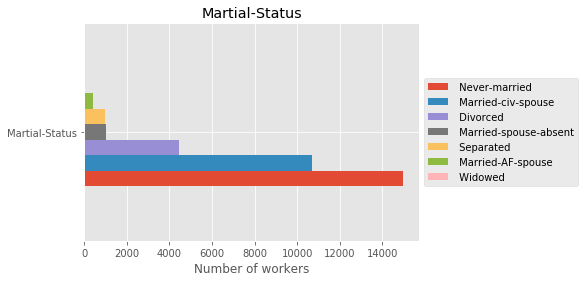

In [28]:
plotHBarGraph('Martial-Status')

martial status looks usable. partners definitely be spending that dough so u need more moneys

In [29]:
adult['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

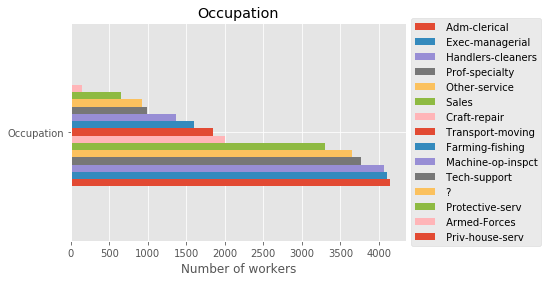

In [30]:
plotHBarGraph('Occupation')

occupation looks usable

In [31]:
column_name = 'Relationship'
adult[column_name].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

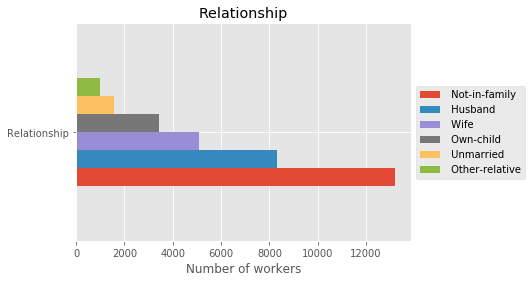

In [32]:
plotHBarGraph(column_name)

relationship looks usable

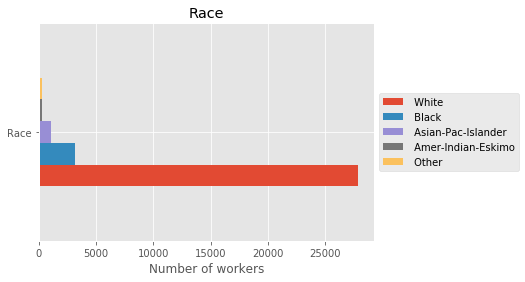

In [33]:
column_name = 'Race'
plotHBarGraph(column_name)

race theoretically may be a useful predictor, but because of the small number of samples in some categories i dont think it will show good results in this data set analysis

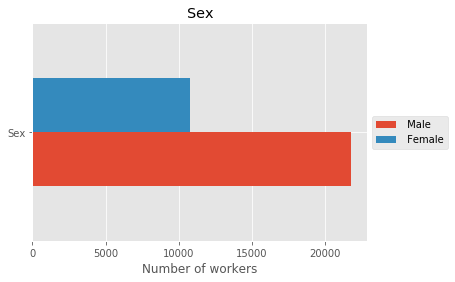

In [34]:
plotHBarGraph('Sex')

this looks like it will be useful. large count of samples and easy 2 variables. 

In [35]:
column_name = 'Capital-gain'
series = adult[column_name]
series.describe()

count   32,561
mean     1,078
std      7,385
min          0
25%          0
50%          0
75%          0
max     99,999
Name: Capital-gain, dtype: float64

describe suggests a lot of zeros in this dataset. 

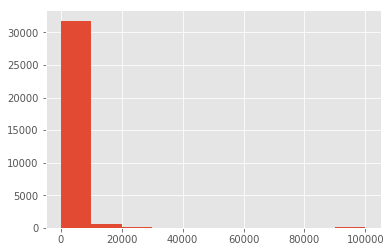

In [36]:
series.hist()

i will not use this one. there is way too many 0s. 

In [37]:
def drawHist(column_name, bin_count = None):
    if bin_count == None:
        bin_count = 10
    adult[column_name].hist(bins = bin_count)

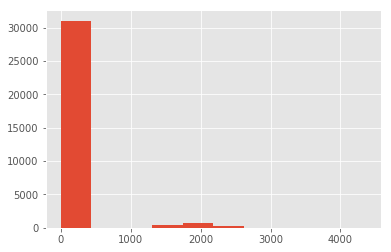

In [38]:
drawHist('Captial-loss')

same deal, a lot of zeros in the data set. i will not use this. 

In [39]:
adult['Natie-Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [40]:
returnResults('Natie-Country')

,United-States,Cuba,Jamaica,India,?,Mexico,South,Puerto-Rico,Honduras,England,...,Outlying-US(Guam-USVI-etc),Scotland,Trinadad&Tobago,Greece,Nicaragua,Vietnam,Hong,Ireland,Hungary,Holand-Netherlands
Natie-Country,29170,643,583,198,137,121,114,106,100,95,...,19,19,18,18,16,14,13,13,12,1


this includes a LOT of american results - may not have enough samples to be considered in the clustering analysis

In [41]:
column_name = 'Earnings-Raw'
adult[column_name].head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Earnings-Raw, dtype: object

In [42]:
returnResults(column_name)

,<=50K,>50K
Earnings-Raw,24720,7841


### 2) Feature selection and normalization

From your analysis in (1) above, select at least 6 distinct attributes in addition to income for clustering. By distinct, I’m refering to non-redundant, i.e., non-correlated, feature attributes. For example, don’t select both forms of education. 

Select features you think may have a strong (positive or negative) association with higher income, and select features of multile types, e.g., continuous, discrete, ordinal, and categorical. You may select more, and you may want to change your feature selection as you experiment.

Feel free to use additional tools we learned as part of our data analysis work.

You also may want to not select columns with many missing values.

Enter your attribute selections in the cell below.

In [43]:
adult.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'Education', 'Education-Num',
       'Martial-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Captial-loss', 'Hours-per-week', 'Natie-Country',
       'Earnings-Raw'],
      dtype='object')

##### your work here

Relationship, Marital-Status, Occupation, Sex, Age, Hours-per-week

In [44]:
selected_columns = ['Relationship', 'Age', 'Martial-Status', 'Occupation','Sex','Hours-per-week']

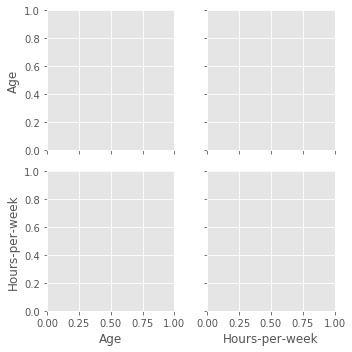

In [45]:
import seaborn as sns
sns.PairGrid(data=adult[selected_columns])

oops i have to normalize the data first? going to keep reading the lab

In [46]:
adult[selected_columns].head()


,Relationship,Age,Martial-Status,Occupation,Sex,Hours-per-week
0,Not-in-family,39,Never-married,Adm-clerical,Male,40
1,Husband,50,Married-civ-spouse,Exec-managerial,Male,13
2,Not-in-family,38,Divorced,Handlers-cleaners,Male,40
3,Husband,53,Married-civ-spouse,Handlers-cleaners,Male,40
4,Wife,28,Married-civ-spouse,Prof-specialty,Female,40


In [47]:
df = adult[selected_columns]

** Feature normalization**

For each of your selected features, identify a strategy to normalize your data between 0 and 1.

- Numerical attributes, e.g., income, are normalized to values between 0 and 1 using min-max normalization. 
- Ordinal attributes, i.e., education, are normalized to a range of 0 to 1. 
- Boolean attributes are set to either 0 or 1.
- Categorical attributes are assigned an integer enumerated type, e.g., 1, 2, 3, ... and return 1 if there is a match, 0 otherwise.

Define your strategy and normalize each of your features in the cell(s) below. This is arguably the most important step in the lab.

In [75]:
pd.options.display.float_format = '{:, .4f}'.format

##### your work here - strategy
occupation, relationship, martial-status, and sex and all be enumerated

age and hours per week have to be normalized to the range

In [49]:
df.head()

,Relationship,Age,Martial-Status,Occupation,Sex,Hours-per-week
0,Not-in-family,39,Never-married,Adm-clerical,Male,40
1,Husband,50,Married-civ-spouse,Exec-managerial,Male,13
2,Not-in-family,38,Divorced,Handlers-cleaners,Male,40
3,Husband,53,Married-civ-spouse,Handlers-cleaners,Male,40
4,Wife,28,Married-civ-spouse,Prof-specialty,Female,40


In [50]:
from sklearn import preprocessing

In [51]:
ages_normal = preprocessing.minmax_scale(df['Age'].astype('float64'), copy=True).copy()
hours_normal = preprocessing.minmax_scale(df['Hours-per-week'].astype('float64'), copy=True).copy()

In [52]:
print(ages_normal)

[0.30136986 0.45205479 0.28767123 ... 0.56164384 0.06849315 0.47945205]


In [53]:
print(hours_normal)

[0.39795918 0.12244898 0.39795918 ... 0.39795918 0.19387755 0.39795918]


In [54]:
le = preprocessing.LabelEncoder()
le.fit(df['Sex'].unique())
sex_normal = le.transform(df['Sex'])
pp.pprint(sex_normal[0:10])

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1])


In [55]:
def getNormalizedCategoricalData(df_column):
    le = preprocessing.LabelEncoder()
    le.fit(df_column.unique())
    return le.transform(df_column)

In [56]:
hours_normal = getNormalizedCategoricalData(df['Hours-per-week'])
martial_status_normal = getNormalizedCategoricalData(df['Martial-Status'])
occupation_normal = getNormalizedCategoricalData(df['Occupation'])
relationship_normal = getNormalizedCategoricalData(df['Relationship'])

In [58]:
selected_columns

['Relationship',
 'Age',
 'Martial-Status',
 'Occupation',
 'Sex',
 'Hours-per-week']

In [72]:
dataset = [relationship_normal, ages_normal, martial_status_normal, occupation_normal, sex_normal, hours_normal]
# print(dataset)
# for x in dataset:
#     x = np.asanyarray(x)
pp.pprint(dataset)

[array([1, 0, 1, ..., 4, 3, 5]),
 array([0.30136986, 0.45205479, 0.28767123, ..., 0.56164384, 0.06849315,
       0.47945205]),
 array([4, 2, 0, ..., 6, 4, 2]),
 array([1, 4, 6, ..., 1, 1, 4]),
 array([1, 1, 1, ..., 0, 1, 0]),
 array([39, 12, 39, ..., 39, 19, 39])]


In [73]:
df2 = pd.DataFrame.from_records(dataset)

In [76]:
df2.head()

ValueError: Invalid format specifier

ValueError: Invalid format specifier

** Missing values **

Examine the dataset, and your selected features for missing values. You will need to come up with a strategy for dealing with missing values for each of your selected attributes. 

Strategies:

- Replace mssing values with the most likely value, e.g., mode for categorical or boolean, mean for continuous, etc. This can be risky, since you distort the relationships in the data.
- Encode missing values that will work within a *distance* function. Sometimes, the fact that the feature *is* missing has meaning.
- Just delete the row containing the missing value. As long as you do not throw away too much data, this can be the best strategy.

Define your missing value strategy in the cell(s) below and correct missing values..

In [ ]:
# your work here

### 3) Creating a cluster dataset

Using your selected attributes and the income attribute, create a new *clustering* dataframe where each attriubte is normalized and where you've dealth with missing values.

In [ ]:
# your work here

** Validate your clustering dataframe**

This may be the most important step. Examine the records in your database, and run the appropriate statistical methods on each of your selected attribute columns to make sure everything is sane.

In [ ]:
# your work here

### 5) K-Means Clustering

1 - Use scikit-learn and implement the function *get_kmeans_score(data,K)*"

2 - Run your solution for 1 to 10 values of K. 

3 - Save SSE values for each trial in a list. To obtain a score related to the model fit:   
    `score = np.abs(model.score(data))`

4 - Plot your results in a scree plot similar to the following:

<img src="screeplot.png">

5 - Identify your optimal value for K.

In [ ]:
def get_kmeans_score(data, K):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        K - the number of centroids you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    
    # your work here
    score 0
    return score

### 6) Clustering evaluation

Repeat step (5) above for k=2,3,4, and 5.

Tabulate your results for k=2,3,4,5, and 6 (your first trial).

Qualitatively which value of k provided the best clustering results?

What attributes are the most effective for generating clusters for income (without using the income attribute!)?



### 7) Clustering using other methods

Apply hierarchical aglomerative clustering to the same data set. Experiment with 2 or 3 different linkages. For each case display the Cophenetic Correlation Coefficient, and generate a dendogram. See the [SciPy Hierarchical Clustering and Dendrograms](../../notebooks/SciPy%20Hierarchical%20Clustering%20and%20Dendrograms.ipynb) for tips.